In [201]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score, mean_absolute_error
from scipy import stats

In [202]:
train = pd.read_csv('Data for Cleaning & Modeling.csv')
test = pd.read_csv('Holdout for Testing.csv')

In [203]:
train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


In [204]:
test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,NaN,44409194,47416907,"$6,000","$6,000","$6,000",36 months,C,C5,Electrician,...,2-Nov,1,26.0,NaN,18,0,19861,64.50%,33,f
1,NaN,44017917,47034722,"$24,000","$24,000","$24,000",36 months,A,A1,Executive Assistant,...,Dec-68,1,NaN,NaN,12,0,17001,26.20%,36,w
2,NaN,44259158,47306871,"$35,000","$35,000","$35,000",36 months,C,C2,District Sales Leader,...,Oct-98,0,NaN,NaN,16,0,25797,49.90%,33,w
3,NaN,44429213,47476932,"$10,000","$10,000","$10,000",60 months,D,D1,pharmacy associate,...,Feb-99,1,NaN,114.0,13,1,9586,43.80%,21,w
4,NaN,44299188,47346901,"$24,000","$24,000","$24,000",60 months,B,B1,Medical case manager,...,2-Dec,0,48.0,NaN,27,0,31842,41.30%,43,w


In [205]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 32 columns):
X1     338990 non-null object
X2     399999 non-null float64
X3     399999 non-null float64
X4     399999 non-null object
X5     399999 non-null object
X6     399999 non-null object
X7     399999 non-null object
X8     338730 non-null object
X9     338730 non-null object
X10    376014 non-null object
X11    382462 non-null object
X12    338639 non-null object
X13    338972 non-null float64
X14    399999 non-null object
X15    399999 non-null object
X16    123560 non-null object
X17    399999 non-null object
X18    399981 non-null object
X19    399999 non-null object
X20    399999 non-null object
X21    399999 non-null float64
X22    399999 non-null float64
X23    399999 non-null object
X24    399999 non-null float64
X25    181198 non-null float64
X26    51155 non-null float64
X27    399999 non-null float64
X28    399999 non-null float64
X29    399999 non-null float64
X30    39

Check the Missing Values

X26    0.872112
X16    0.691100
X25    0.547005
X12    0.153402
X8     0.153175
X9     0.153175
X13    0.152570
X1     0.152525
X10    0.059965
X11    0.043845
X30    0.000668
X18    0.000048
X24    0.000003
X2     0.000003
X3     0.000003
X4     0.000003
X5     0.000003
X6     0.000003
X7     0.000003
X29    0.000003
X28    0.000003
X23    0.000003
X27    0.000003
X14    0.000003
X15    0.000003
X31    0.000003
X17    0.000003
X19    0.000003
X20    0.000003
X21    0.000003
X22    0.000003
X32    0.000003
dtype: float64


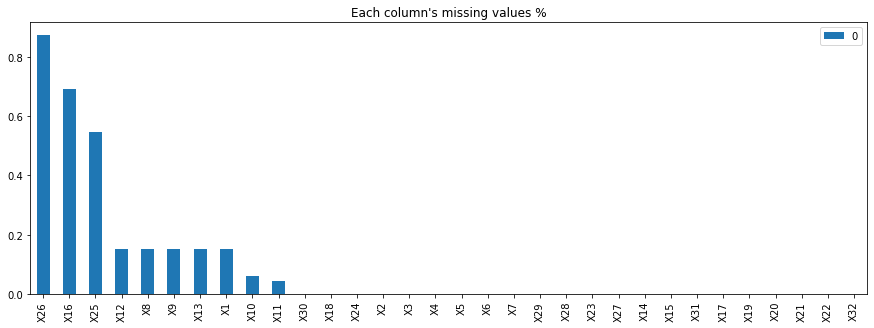

In [206]:
print((train.isnull().sum()[train.isnull().sum()/len(train)>0]/len(train)).sort_values(ascending =False))
pd.DataFrame((train.isnull().sum()/len(train)).sort_values(ascending =False)).plot(kind='bar',figsize=(15,5),title='Each column\'s missing values %')

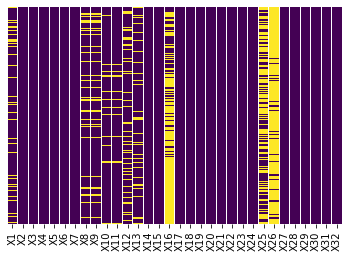

In [207]:
train.isnull().sum()
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [208]:
train = train.dropna(subset = ['X2'])

In [209]:
#Change the Formatting in X15 to 'Month-Date'
column = ['X15']
for content in column:
    train[content + '_month'] = train[content].apply(lambda x : x[0:3])
    test[content + '_month'] = test[content].apply(lambda x : x[3:6])

In [210]:
# Extracting the Month From Monthdate
train.drop(column, axis = 1, inplace = True)
test.drop(column, axis = 1, inplace = True)
month_order = test['X15_month'].unique()
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for content in column:
    test[content + '_month'] = test[content + '_month'].apply(lambda x : month_order.index(x))
    train[content + '_month'] = train[content + '_month'].apply(lambda x : month_order.index(x))

In [211]:
#Merge the Train and Test Data
data_merged = train.append(test)

In [212]:
data_merged['X11'] = data_merged['X11'].fillna('0 year')
data_merged['X12'] = data_merged['X12'].fillna('OTHER')
term = {'RENT': 'RENT', 'OWN': 'OWN', "MORTGAGE": 'MORTGAGE', 'NONE': 'OTHER', 'OTHER':'OTHER','ANY': 'OTHER'}
data_merged['X12'] = data_merged.X12.map(term)

data_merged['X13'] = data_merged['X13'].fillna(np.mean(data_merged['X13']))

In [213]:
col = ['X2', 'X3', 'X8', 'X10','X16', 'X18', 'X19', 'X23','X25', 'X26' ]
data_merged.drop(col, axis = 1, inplace = True)

exch = {' 36 months': 36, ' 60 months': 60}
data_merged['X7'] = data_merged.X7.map(exch)

In [214]:
onehot = ['X9','X11','X12', 'X14','X15_month','X17', 'X20', 'X32']

def one_hot_encode(df, new_cat, prefix):
    for value, pref in zip(new_cat, prefix):
        dummy = pd.get_dummies(df[value], prefix = pref)
        df = pd.concat([df, dummy], axis = 1)
        df = df.drop(value, axis = 1)
    return df

In [215]:
#Get Dummy
data_merged = pd.get_dummies(data_merged, columns=onehot, drop_first=True)

In [216]:
data_merged['X4'] = data_merged['X4'].str[1:]
data_merged['X4'] = data_merged['X4'].replace(',','', regex=True)
data_merged['X4'] = data_merged['X4'].astype(np.float)

data_merged['X5'] = data_merged['X5'].str[1:]
data_merged['X5'] = data_merged['X5'].replace(',','', regex=True)
data_merged['X5'] = data_merged['X5'].astype(np.float)

data_merged['X6'] = data_merged['X6'].str[1:]
data_merged['X6'] = data_merged['X6'].replace(',','', regex=True)
data_merged['X6'] = data_merged['X6'].astype(np.float)

data_merged['X30'] = data_merged['X30'].str[:-1]
data_merged['X30'] = data_merged['X30'].astype(np.float)/100

In [217]:
data_merged.reset_index(inplace = True)
data_merged.drop('index', axis = 1, inplace = True)
train_data = data_merged[0:399998]
test_data = data_merged[399999:]

X1     0.152526
X30    0.000665
dtype: float64


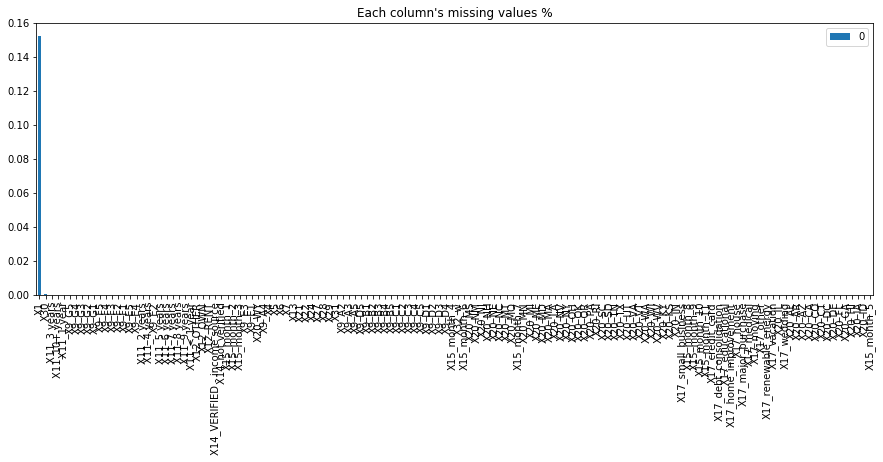

In [218]:
print((train_data.isnull().sum()[train_data.isnull().sum()/len(train_data)>0]/len(train_data)).sort_values(ascending =False))
pd.DataFrame((train_data.isnull().sum()/len(train_data)).sort_values(ascending =False)).plot(kind='bar',figsize=(15,5),title='Each column\'s missing values %')

X1     1.000000
X30    0.000375
dtype: float64


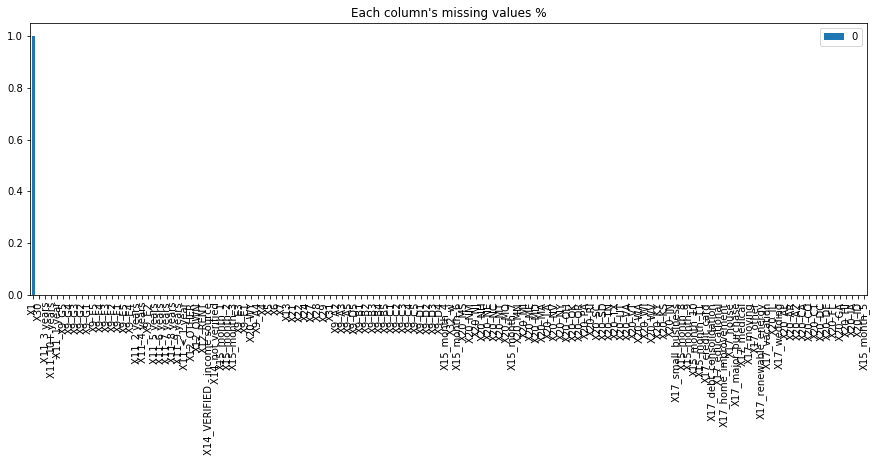

In [219]:
print((test_data.isnull().sum()[test_data.isnull().sum()/len(test_data)>0]/len(test_data)).sort_values(ascending =False))
pd.DataFrame((test_data.isnull().sum()/len(test_data)).sort_values(ascending =False)).plot(kind='bar',figsize=(15,5),title='Each column\'s missing values %')

In [220]:
train_data = train_data.dropna(subset = ['X1', 'X30'])

In [221]:
train_data['X1'] = train_data['X1'].str[:-1]
train_data['X1'] = train_data['X1'].astype(np.float)/100

In [222]:
test_data['X30'] = test_data['X30'].fillna(np.mean(test_data['X30']))

C:\Users\Richa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Step 2: Build Models

In [223]:
#Prepare the data, split the X and Y data for train and test
X_train = train_data.drop('X1', axis = 1)
y_train = train_data['X1']
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train , X_test , y_train , y_test = train_test_split(X_train , y_train , test_size=0.2 , random_state=61)

In [224]:
results = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2', 'Pearson R2', 'Adjusted R2'])

def append_results(model, y_test, y_pred, X_test):
    ## use concat to append results to dataframe
    results = pd.DataFrame({'Model': model,
                            'MAE': mean_absolute_error(y_test, y_pred),
                            'MSE': mean_squared_error(y_test, y_pred),
                            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
                            'R2': r2_score(y_test, y_pred),
                            'Pearson R2': stats.pearsonr(y_test, y_pred)[0],
                            'Adjusted R2': 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}, index=[0])
    return results

#### SVM

In [225]:
from sklearn.svm import SVR
svm_regressor = SVR(kernel = 'rbf')
svm_regressor.fit(X_train, y_train)

SVR()

In [226]:
y_pred__train_SVM = svm_regressor.predict(X_train)
y_pred_test_SVM = svm_regressor.predict(X_test)

print(append_results('SVM', y_train, y_pred__train_SVM, X_test))
print(append_results('SVM', y_test, y_pred_test_SVM, X_test))

  Model       MAE      MSE      RMSE        R2  Pearson R2  Adjusted R2
0   SVM  0.038016  0.00216  0.046476 -0.128483    0.503319    -0.129054
  Model       MAE       MSE      RMSE       R2  Pearson R2  Adjusted R2
0   SVM  0.038015  0.002161  0.046485 -0.12223     0.50622    -0.124503


#### Linear Regression

In [227]:
#Fit the Model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [228]:
r_sq = lr.score(X_train, y_train)
print('Coefficient of Determination = ', r_sq)

Coefficient of Determination =  0.8008971195974024


In [229]:
y_pred__train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)

print(append_results('Linear Regression', y_train, y_pred__train_lr, X_test))
print(append_results('Linear Regression', y_test, y_pred_test_lr, X_test))

               Model       MAE       MSE      RMSE        R2  Pearson R2  \
0  Linear Regression  0.012417  0.000381  0.019522  0.800897    0.894929   

   Adjusted R2  
0     0.800796  
               Model       MAE       MSE      RMSE        R2  Pearson R2  \
0  Linear Regression  0.012402  0.000382  0.019557  0.801368    0.895194   

   Adjusted R2  
0     0.800966  


#### Decision Tree Regressor

In [230]:
from sklearn.tree import DecisionTreeRegressor 
dt_regressor = DecisionTreeRegressor(random_state = 0) 
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [231]:
y_pred__train_DTR = dt_regressor.predict(X_train)
y_pred_test_DTR = dt_regressor.predict(X_test)

print(append_results('Decision Tree', y_train, y_pred__train_DTR, X_test))
print(append_results('Decision Tree', y_test, y_pred_test_DTR, X_test))

           Model           MAE           MSE          RMSE   R2  Pearson R2  \
0  Decision Tree  2.045280e-17  7.637130e-33  8.739068e-17  1.0         1.0   

   Adjusted R2  
0          1.0  
           Model       MAE       MSE      RMSE        R2  Pearson R2  \
0  Decision Tree  0.010949  0.000433  0.020808  0.775136    0.887477   

   Adjusted R2  
0      0.77468  


#### Step 3: Test your models

In [232]:
results = pd.concat([results, append_results('Linear Regression', y_test, y_pred_test_lr, X_test)], ignore_index=True)
results = pd.concat([results, append_results('Decision Tree', y_test, y_pred_test_DTR, X_test)], ignore_index=True)
results = pd.concat([results, append_results('SVM', y_test, y_pred_test_SVM, X_test)], ignore_index=True)
results.sort_values(by='RMSE', ascending=True)

,Model,MAE,MSE,RMSE,R2,Pearson R2,Adjusted R2
0,Linear Regression,0.012402,0.000382,0.019557,0.801368,0.895194,0.800966
1,Decision Tree,0.010949,0.000433,0.020808,0.775136,0.887477,0.774680
2,SVM,0.038015,0.002161,0.046485,-0.122230,0.506220,-0.124503


#### Step 4: Submit your work:

In [233]:
X_test = test_data.drop('X1', axis = 1)
y_test = test_data['X1']
X_test = scaler.fit_transform(X_test)

In [234]:
y_pred = model.predict(X_test)
len(y_pred)

80000

In [235]:
data_test = pd.read_csv('Holdout for Testing.csv')
data_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,NaN,44409194,47416907,"$6,000","$6,000","$6,000",36 months,C,C5,Electrician,...,2-Nov,1,26.0,NaN,18,0,19861,64.50%,33,f
1,NaN,44017917,47034722,"$24,000","$24,000","$24,000",36 months,A,A1,Executive Assistant,...,Dec-68,1,NaN,NaN,12,0,17001,26.20%,36,w
2,NaN,44259158,47306871,"$35,000","$35,000","$35,000",36 months,C,C2,District Sales Leader,...,Oct-98,0,NaN,NaN,16,0,25797,49.90%,33,w
3,NaN,44429213,47476932,"$10,000","$10,000","$10,000",60 months,D,D1,pharmacy associate,...,Feb-99,1,NaN,114.0,13,1,9586,43.80%,21,w
4,NaN,44299188,47346901,"$24,000","$24,000","$24,000",60 months,B,B1,Medical case manager,...,2-Dec,0,48.0,NaN,27,0,31842,41.30%,43,w


In [236]:
data_test["X1"] = y_pred
data_test.to_csv('Loan_Prediction_Richard_Yang.csv', index=False)

####  Models I used including: Linear Regression, Decision Tree Regressor and SVM
#### From the above results, we can see that the Linear Regression Model has the smallest RMSE and largest R Sqaure which indicates the best model is Linear Rergression model. However, it can be significantly and easily affected by outliers. Also, the model might not be able to descirbe data with more complex relationships. The Decision Tree Modelis a good way to avoid potential missing values and it does not require Normalization or scaling of data, but it prones to overfitting. The running time of the decision tree modeel is longer the the others. The SVM is more accurate if the demension gets higher, and it is tough to deal with large amount of data.